In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn import preprocessing
from sklearn import svm
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [33]:
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [36]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<ipython-input-39-c9b2c743119c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris.corr()
<ipython-input-39-c9b2c743119c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(iris.corr(),annot=True,fmt='.2f')


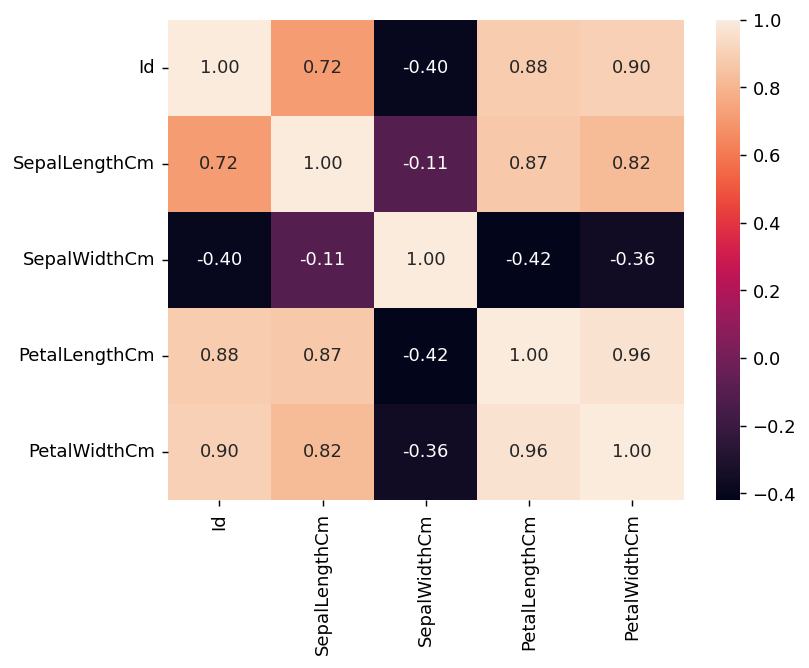

In [39]:
corr=iris.corr()
plt.figure(dpi=130)
sb.heatmap(iris.corr(),annot=True,fmt='.2f')
plt.show()

In [40]:
y=iris.iloc[:,:-1]
z=iris.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(y,z,test_size=0.5,random_state=0)

In [41]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
3,4,4.6,3.1,1.5,0.2
149,150,5.9,3.0,5.1,1.8
98,99,5.1,2.5,3.0,1.1
6,7,4.6,3.4,1.4,0.3
68,69,6.2,2.2,4.5,1.5
...,...,...,...,...,...
9,10,4.9,3.1,1.5,0.1
103,104,6.3,2.9,5.6,1.8
67,68,5.8,2.7,4.1,1.0
117,118,7.7,3.8,6.7,2.2


In [42]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,115,5.8,2.8,5.1,2.4
62,63,6.0,2.2,4.0,1.0
33,34,5.5,4.2,1.4,0.2
107,108,7.3,2.9,6.3,1.8
7,8,5.0,3.4,1.5,0.2
...,...,...,...,...,...
111,112,6.4,2.7,5.3,1.9
95,96,5.7,3.0,4.2,1.2
20,21,5.4,3.4,1.7,0.2
15,16,5.7,4.4,1.5,0.4


In [43]:
y_train

3          Iris-setosa
149     Iris-virginica
98     Iris-versicolor
6          Iris-setosa
68     Iris-versicolor
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 75, dtype: object

In [44]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
            ...       
111     Iris-virginica
95     Iris-versicolor
20         Iris-setosa
15         Iris-setosa
52     Iris-versicolor
Name: Species, Length: 75, dtype: object

In [45]:
knn=KNeighborsClassifier(n_neighbors=3)

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred=knn.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'

In [49]:
target_names=['Setosa','Versicolor','Virginica']

In [51]:
report=classification_report(y_test,y_pred,target_names=target_names)
report

'              precision    recall  f1-score   support\n\n      Setosa       1.00      1.00      1.00        21\n  Versicolor       1.00      1.00      1.00        30\n   Virginica       1.00      1.00      1.00        24\n\n    accuracy                           1.00        75\n   macro avg       1.00      1.00      1.00        75\nweighted avg       1.00      1.00      1.00        75\n'

In [52]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

NameError: name 'accuracy_score' is not defined